In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Aula 5 - Parte 3

# Exercício 1
**Objetivo: ligar a decomposição por auto-valores e auto-vetores ao seu respectivo código computacional e verificar sua limitação para matrizes quadradas**

Já sabemos que uma matriz quadrada $X$ pode ser decomposta em termos de seus auto-vetores (na matriz $P$) e auto-valores (na diagonal da matriz $D$) na forma:

$$
A = P D P^{-1}.
$$

O código abaixo realiza essa decomposição e a recomposição.

a) Por que a matriz `B` no código é igual à matriz `A`?

b) Modifique o código para que a matriz `A` deixe de ser quadrada (por exemplo, adicionando uma linha ou coluna). Que erro é apontado no código?

c) Se a matriz $A$ na equação $A = P D P^{-1}$ não for quadrada, que problema deve aparecer na operação $P D P^{-1}$ em relação à dimensões de $P$ e $D$?


In [3]:
A = np.array( [[1, 2], [2, 3]] )
w, v = np.linalg.eig(A)
#print(w, v)
w_ = np.diag(w)
#print(w_)
B = v @ w_ @ np.linalg.inv(v)

print(B)

[[1. 2.]
 [2. 3.]]


##### A)
A matriz B no código é igual à matriz A por que estamos aplicando a mesma decomposição mostrada `A = P D P⁻¹`

In [4]:
A_nao_quadrada = np.array([[1, 2], [2, 3], [3, 4]])
print(f"Matriz não-quadrada (3x2):\n{A_nao_quadrada}")
print(f"Dimensões: {A_nao_quadrada.shape}")
w, v = np.linalg.eig(A_nao_quadrada)

Matriz não-quadrada (3x2):
[[1 2]
 [2 3]
 [3 4]]
Dimensões: (3, 2)


LinAlgError: Last 2 dimensions of the array must be square

##### C)
Resultado: P D P⁻¹ seria m × m ≠ m × n

# Exercício 2
**Objetivo: entender SVD como uma decomposição**

Quando calculamos $P$ e $D$ em $A=PDP^{-1}$, estamos *decompondo* a matriz $A$ em *componentes* ($P$, $D$ e $P^{-1}$).

Essa decomposição não é a única possibilidade. Uma outra, muito utilizada, é a decomposição em valores singulares (*Singular Value Decomposition*, ou **SVD**):

$$
A = U \Sigma V^T
$$

No código abaixo:

a) Confirme que a matriz `B` é igual à matriz `A`

b) Compare o conteúdo das matrizes `u`, `sigma` e `vt` ao conteúdo das matrizes `v` e `w_` no exercício anterior.

c) Altere o código para verificar se a decomposição SVD ainda funciona se a matriz `A` não for quadrada.

d) Se a matriz `A` não é quadrada, quais são as dimensões das matrizes `u`, `sigma` e `vt`?

e) O que a função `diagsvd` faz, e por que ela tem três parâmetros?

In [7]:
from scipy.linalg import svd, diagsvd
import numpy as np
A = np.array( [[1, 2], [2, 3]] )
u, s, vt = svd(A)
sigma = diagsvd(s, A.shape[0], A.shape[1])

B = u @ sigma @ vt
print(A)
print(B)

[[1 2]
 [2 3]]
[[1. 2.]
 [2. 3.]]


##### A)
Sim, são iguais

##### B)

In [8]:
w, v = np.linalg.eig(A)
print("DECOMPOSIÇÃO POR AUTOVALORES:")
print(f"Autovalores: {w}")
print(f"Autovetores (colunas):\n{v}")

print("\nDECOMPOSIÇÃO SVD:")
print(f"Valores singulares: {s}")
print(f"Matriz U:\n{u}")
print(f"Matriz V^T:\n{vt}")

print("\nDIFERENÇAS PRINCIPAIS:")
print("1. Valores singulares são SEMPRE reais e não-negativos")
print("2. Matrizes U e V são SEMPRE ortogonais (U^T = U⁻¹, V^T = V⁻¹)")
print("3. SVD funciona para qualquer matriz, não apenas quadradas")

DECOMPOSIÇÃO POR AUTOVALORES:
Autovalores: [-0.23606798  4.23606798]
Autovetores (colunas):
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]

DECOMPOSIÇÃO SVD:
Valores singulares: [4.23606798 0.23606798]
Matriz U:
[[-0.52573111 -0.85065081]
 [-0.85065081  0.52573111]]
Matriz V^T:
[[-0.52573111 -0.85065081]
 [ 0.85065081 -0.52573111]]

DIFERENÇAS PRINCIPAIS:
1. Valores singulares são SEMPRE reais e não-negativos
2. Matrizes U e V são SEMPRE ortogonais (U^T = U⁻¹, V^T = V⁻¹)
3. SVD funciona para qualquer matriz, não apenas quadradas


##### C), D) e E)

In [13]:
# C
A_retangular = np.array([[1, 2], [3, 4], [5, 6]])

u_ret, s_ret, vt_ret = svd(A_retangular)
sigma_ret = diagsvd(s_ret, A_retangular.shape[0], A_retangular.shape[1])

B_ret = u_ret @ sigma_ret @ vt_ret
B_ret

# D
print("Para matriz A (m x n):")
print(f"A_retangular.shape = {A_retangular.shape}")
print(f"\nValores singulares (s): vetor com min(m,n) = {len(s_ret)} elementos")

# E
# A função diagsvd(s, m, n) cria a matriz Σ a partir do vetor s:
# s: vetor dos valores singulares
# m: número de linhas da matriz original
# n: número de colunas da matriz original



Para matriz A (m x n):
A_retangular.shape = (3, 2)

Valores singulares (s): vetor com min(m,n) = 2 elementos


# Exercício 3
**Objetivo: Manipular a matriz $\Sigma$ em uma imagem e verificar os resultados**

Na decomposição SVD, usamos a formulação:

$
A = U \Sigma V^T,
$

onde:

* As colunas de $U$ são os auto-vetores de $A^T A$,
* As colunas de $V$ (e, portanto, as linhas de $V^T$) são auto-vetores de $A A^T$,
* $\Sigma$ é uma matriz onde $s_{i,i}$ é a raiz quadrada dos auto-valores de $A^T A$ ou de $A A^T$.

A [demonstração disso está aqui](./demonstracao_svd.md), e uma outra perspectiva sobre essa demonstração está [aqui](https://gregorygundersen.com/blog/2018/12/20/svd-proof/).


Vamos agora verificar o que esses valores representam.

O código abaixo abre uma imagem em tons de cinza e faz uma decomposição SVD.

a) Qual é a dimensão da imagem lida?

b) Quais são as dimensões das matrizes `u`, `sigma` e `vt`?

c) Os valores da matriz `sigma` vêm da matriz `s`. O que acontece com a imagems se o primeiro elemento de `s` for modificado para ficar igual a `0` (dica: use `s[0] *= 0`)?

d) Remova progressivamente mais elementos da matriz `s` igualando-os a zero. O que acontece com a imagem formada?

e) Agora, remova elementos do *final* da matriz `s` igualando-os a zero. O que acontece com a imagem?

f) Experimente perceptualmente e verifique quantos elementos você consegue remover do final da matriz `s` até que perceba alguma diferença na imagem?

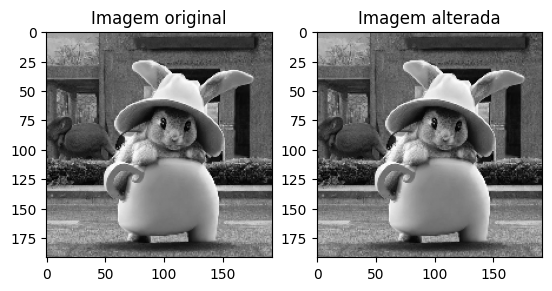

In [20]:
from scipy.linalg import svd, diagsvd
import matplotlib.image as mpimg

A = mpimg.imread("rabbit.jpeg").mean(axis=2)[0::4,0::4]

u, s, vt = svd(A)

# Altere daqui para baixo
s = s
# Altere daqui para cima

sigma = diagsvd(s, A.shape[0], A.shape[1])

B = u @ sigma @ vt

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(A, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagem alterada')
plt.imshow(B, cmap='gray')
plt.show()


(a) Dimensão da imagem: (192, 192)
   - 192 linhas (altura)
   - 192 colunas (largura)

(b) Dimensões das matrizes SVD:
   - U: (192, 192)
   - s: (192,) (192 valores singulares)
   - Vᵀ: (192, 192)

(c) Primeiro valor singular = 0:


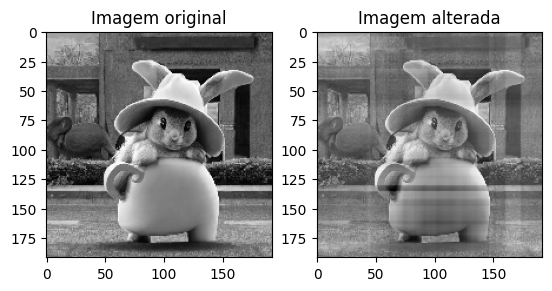


(d) Removendo progressivamente:


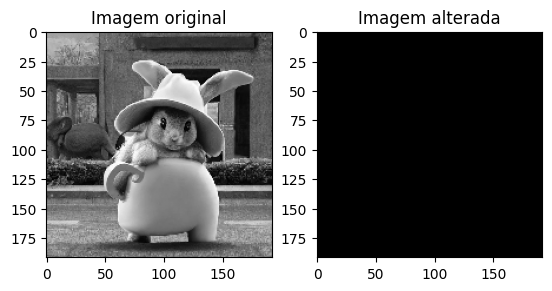


(e) Removendo o final:


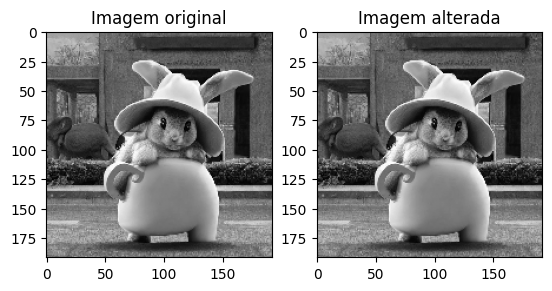


(f) Removendo o perceptualmente:


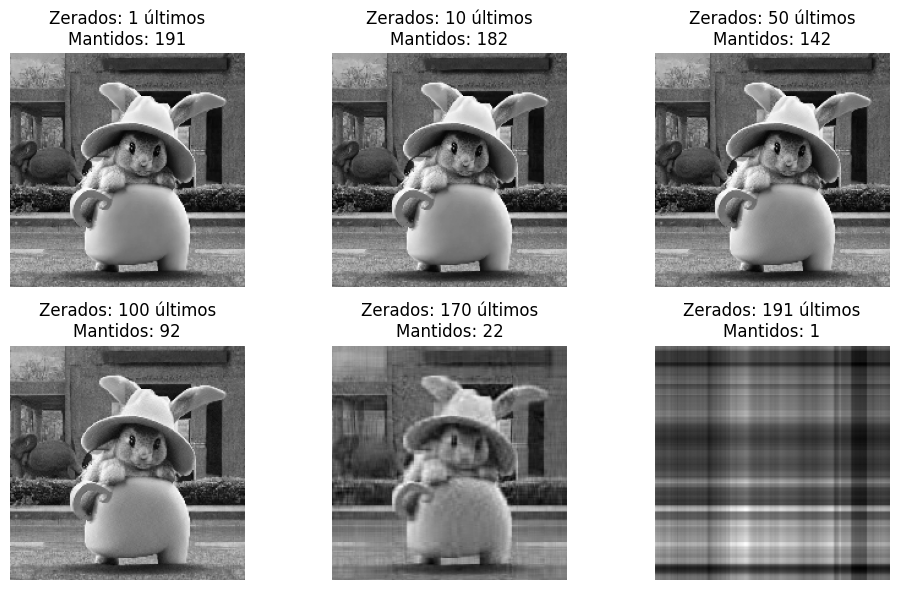

In [129]:
# a)
print(f"\n(a) Dimensão da imagem: {A.shape}")
print(f"   - {A.shape[0]} linhas (altura)")
print(f"   - {A.shape[1]} colunas (largura)")

# b)
u, s, vt = svd(A)
print(f"\n(b) Dimensões das matrizes SVD:")
print(f"   - U: {u.shape}")
print(f"   - s: {s.shape} ({len(s)} valores singulares)")
print(f"   - Vᵀ: {vt.shape}")

# c)
print(f"\n(c) Primeiro valor singular = 0:")

A = mpimg.imread("rabbit.jpeg").mean(axis=2)[0::4,0::4]
u, s, vt = svd(A)

# Altere daqui para baixo
s[0] *= 0
# Altere daqui para cima

sigma = diagsvd(s, A.shape[0], A.shape[1])

B = u @ sigma @ vt

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(A, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagem alterada')
plt.imshow(B, cmap='gray')
plt.show()

# d)
print(f"\n(d) Removendo progressivamente:")

A = mpimg.imread("rabbit.jpeg").mean(axis=2)[0::4,0::4]
u, s, vt = svd(A)

for i in range(len(s)):
    s[i] *= 0

sigma = diagsvd(s, A.shape[0], A.shape[1])

B = u @ sigma @ vt

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(A, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagem alterada')
plt.imshow(B, cmap='gray')
plt.show()

# e)
print(f"\n(e) Removendo o final:")

A = mpimg.imread("rabbit.jpeg").mean(axis=2)[0::4,0::4]
u, s, vt = svd(A)

for i in range(len(s)):
    if i > 190:
        s[i] *= 0
sigma = diagsvd(s, A.shape[0], A.shape[1])

B = u @ sigma @ vt

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(A, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagem alterada')
plt.imshow(B, cmap='gray')
plt.show()

# f)
print(f"\n(f) Removendo o perceptualmente:")

A = mpimg.imread("rabbit.jpeg").mean(axis=2)[0::4,0::4]
u, s, vt = svd(A)

plt.figure(figsize=(10, 6))

total_s = len(s)
for i, num_zeros in enumerate([total_s-1, total_s-10, total_s-50, total_s-100, total_s-170, total_s-191]):
    if num_zeros < 1:
        num_zeros = 1
        
    s_mod = s.copy()
    s_mod[num_zeros:] = 0
    
    sigma = diagsvd(s_mod, A.shape[0], A.shape[1])
    B = u @ sigma @ vt
    
    plt.subplot(2, 3, i+1)
    plt.title(f'Zerados: {total_s - num_zeros} últimos\nMantidos: {num_zeros}')
    plt.imshow(B, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


# Exercício 4
**Objetivo: Remover ruídos de uma imagem manipulando a matriz S**

Uma possível maneira de remover ruídos de uma imagem é a seguinte:

* Fazemos a decomposiçao SVD da imagem
* Removemos os elementos de menor magnitude da matriz $\Sigma$
* Reconstituímos a imagem

a) Aplique esse procedimento para tentar remover os ruídos que foram adicionados à imagem abaixo.

b) Qual é a relação entre o ruído removido da imagem e a distorção causada na imagem?

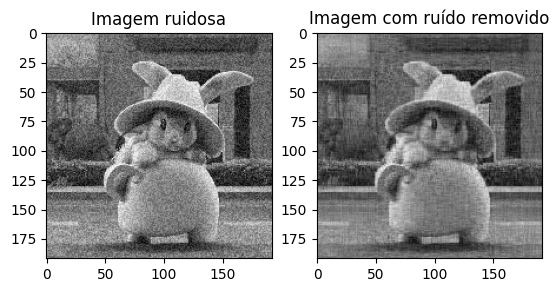

In [131]:
from scipy.linalg import svd, diagsvd
import matplotlib.image as mpimg

A = mpimg.imread("rabbit.jpeg").mean(axis=2)[0::4,0::4]
alpha = 0.3
A += alpha * np.random.random(A.shape) * np.max(A)
u, s, vt = svd(A)

# Altere daqui para baixo
for i in range(len(s)):
    if s[i] < 600:
        s[i] = 0
# Altere daqui para cima

sigma = diagsvd(s, A.shape[0], A.shape[1])

B = u @ sigma @ vt
plt.subplot(1,2,1)
plt.title('Imagem ruidosa')
plt.imshow(A, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagem com ruído removido')
plt.imshow(B, cmap='gray')
plt.show()

##### b)
Quanto mais ruído removemos, mais distorção causamos na imagem (mais borrada)

Quanto menos ruído removemos, menos distorção mas mais ruído residual

# Exercício 5
**Objetivo: Comprimir uma imagem modificando a matriz $\Sigma$**

Muitas vezes, admitimos perdas em um processo de compressão. Isso acontece, por exemplo, em compressão de imagens ou de sons: uma pequena distorção, quase imperceptível, é aceitável, desde que isso possibilite comprimir dados.

A compressão de dados funciona "apagando" elementos de uma imagem ou de um som. As diferentes estratégias de compressão se diferenciam em *como escolher* os elementos que são mais imperceptíveis dentro de uma imagem ou som.

Nesta atividade, vamos fazer um compressor de imagens baseado em SVD. O método aplicado é bem conhecido, e uma boa explicação dele pode ser encontrada [aqui](https://medium.com/balabit-unsupervised/image-compression-using-singular-value-decomposition-de20451c69a3).

Veja que, quando eliminamos valores de $\Sigma$ fazendo-os ficar igual a zero, isso é equivalente a remover alguns elementos das matrizes $U$ e de $V^T$. Por exemplo, na decomposição:

$$
U \Sigma V^T = 
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
0 & 0.2
\end{bmatrix}
\begin{bmatrix}
4 & 3 \\
2 & 1
\end{bmatrix}
$$

Se eliminamos o valor $0.2$ de $\Sigma$, ficamos com:

$$ 
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
0 & 0
\end{bmatrix}
\begin{bmatrix}
4 & 3 \\
2 & 1
\end{bmatrix}

= 
\begin{bmatrix}
4 & 3 \\
12 & 9
\end{bmatrix}

$$

Isso é equivalente a simplemente remover esse valor de $\Sigma$, e remover as linhas e colunas de $U$ e $V^T$ que seriam multiplicadas por ele. Daí, ficamos com:
$$
\begin{bmatrix}
1  \\
3 
\end{bmatrix}
\begin{bmatrix}
1 
\end{bmatrix}
\begin{bmatrix}
4 & 3 \\
\end{bmatrix}
= 
\begin{bmatrix}
4 & 3 \\
12 & 9
\end{bmatrix}
$$

A vantagem de remover linhas e colunas diretamente é que passamos a precisar de menos espaço para armazenar nossos dados!

---

Analise o código abaixo. Ele é bastante parecido com o código acima, Altere a função `comprimir` para que ela realize a remoção de elementos que foi mostrada acima. Teste seu código!!!

a) Como o valor de $K$ influencia a compressão da imagem e a qualidade da imagem final?

b) Qual é o menor valor de $K$ para o qual a imagem não perde qualidade?

c) Qual é o maior valor de $K$ que permite reduzir o tamanho ocupado pela imagem?

Tamanho inicial da imagem (bytes):  1769472
Tamanho da representação comprimida:  922200
Compressão: 0.5211724175347222


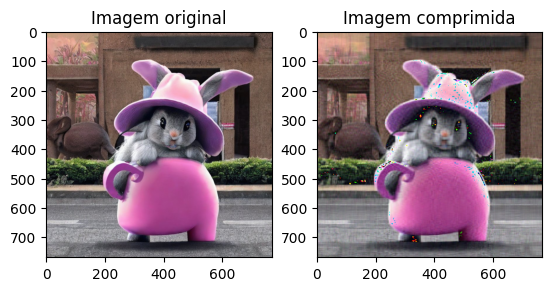

In [158]:
from scipy.linalg import svd, diagsvd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# Altere esta função!
def comprimir (u, s, vt, K):
    """Remove elementos de u, s e vt deixando somente K componentes restantes
    """ 
    u_ = u[:, 0:K]
    s_ = s[0:K]
    vt_ = vt[0:K, :]
    return u_, s_, vt_

A = mpimg.imread("rabbit.jpeg")

u0, s0, vt0 = svd(A[:,:,0])
u1, s1, vt1 = svd(A[:,:,1])
u2, s2, vt2 = svd(A[:,:,2])
n_bytes_inicial = A.nbytes
print("Tamanho inicial da imagem (bytes): ", n_bytes_inicial)

K = 50

u0, s0, vt0 = comprimir(u0, s0, vt0, K)
u1, s1, vt1 = comprimir(u1, s1, vt1, K)
u2, s2, vt2 = comprimir(u2, s2, vt2, K)

sigma0 = diagsvd(s0, u0.shape[1], vt0.shape[0])
sigma1 = diagsvd(s1, u1.shape[1], vt1.shape[0])
sigma2 = diagsvd(s2, u2.shape[1], vt2.shape[0])

n_bytes_final = u0.nbytes + u1.nbytes + u2.nbytes + s0.nbytes + s1.nbytes + s2.nbytes + vt0.nbytes + vt1.nbytes + vt2.nbytes
print("Tamanho da representação comprimida: ", n_bytes_final)
print("Compressão:", n_bytes_final / n_bytes_inicial)

B = np.zeros_like(A)
B[:,:,0] = u0 @ sigma0 @ vt0
B[:,:,1] = u1 @ sigma1 @ vt1
B[:,:,2] = u2 @ sigma2 @ vt2

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(A, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagem comprimida')
plt.imshow(B, cmap='gray')
plt.show()

A)

O valor de K é o indicador de quantos componentes restantes eu estou deixando na imagem, no caso quantos conjuntos de dados vão ser deixados (preservados) na minha reconstrução da imagem. Valores baixos de K significam que poucos dados vão ser usados, impactando na fidelidade da nova representação da imagem, enquanto valores muito altos podem até extrapolar o tamanho da imagem

B)

O valor K que faz com que a imagem não perca nenhuma qualidade é 96, entretanto atingir uma compressão maior que 0.5 faz com que a qualidade perdida não seja muito grande

C)

O maior valor para K que satisfaz a condição de comprimir a imagem é 95